# Petri Net Discovery: Sequencial & Loop & Parallel Workflow Patterns

## Step 1: Setup

In [1]:
import pandas as pd
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import dataframe_utils
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

## Step 2: Load Event Log from CSV

In [2]:
df = pd.read_csv("LE3_Sequential_Loop_Parallel_WF.csv", sep=';',parse_dates=["timestamp"])
df

,timestamp,location,detailed_event_type,caseID
0,11/05/2025 11:34,other,START_LIGHT_PA,11/05/2025
1,11/05/2025 11:35,other,END_LIGHT_PA,11/05/2025
2,11/05/2025 11:54,other,notification_RECEIVED,11/05/2025
3,11/05/2025 11:54,other,notification_READ,11/05/2025
4,11/05/2025 11:54,other,stress_report_low,11/05/2025
5,11/05/2025 13:24,home,START_LIGHT_PA,11/05/2025
6,11/05/2025 13:29,invalid,END_LIGHT_PA,11/05/2025
7,11/05/2025 13:48,other,START_LIGHT_PA,11/05/2025
8,11/05/2025 14:08,other,END_LIGHT_PA,11/05/2025
9,11/05/2025 14:55,home,notification_RECEIVED,11/05/2025


## Step 3: Prepare the Event Log
PM4Py expects specific column names. Let's rename them and sort the log by time within each case.

In [3]:
# Rename columns to PM4Py convention
df = df.rename(columns={
    "timestamp": "time:timestamp",
    "caseID": "case:concept:name",
    "detailed_event_type": "concept:name"
})

# Sort by case and time
df = dataframe_utils.convert_timestamp_columns_in_df(df)
df = df.sort_values(by=["case:concept:name", "time:timestamp"])
df['case:concept:name'] = df['case:concept:name'].dt.strftime('%Y-%m-%d')

# Ensure concept:name is string type
df['concept:name'] = df['concept:name'].astype(str)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 12 to 11
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   time:timestamp     22 non-null     datetime64[ns, UTC]
 1   location           22 non-null     object             
 2   concept:name       22 non-null     object             
 3   case:concept:name  22 non-null     object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 880.0+ bytes


## Step 4: Convert to PM4Py Event Log

In [4]:
from pm4py.objects.conversion.log import converter as log_converter

event_log = log_converter.apply(df, variant=log_converter.Variants.TO_EVENT_LOG)

## Step 5: Discover the Process Tree Using Inductive Miner

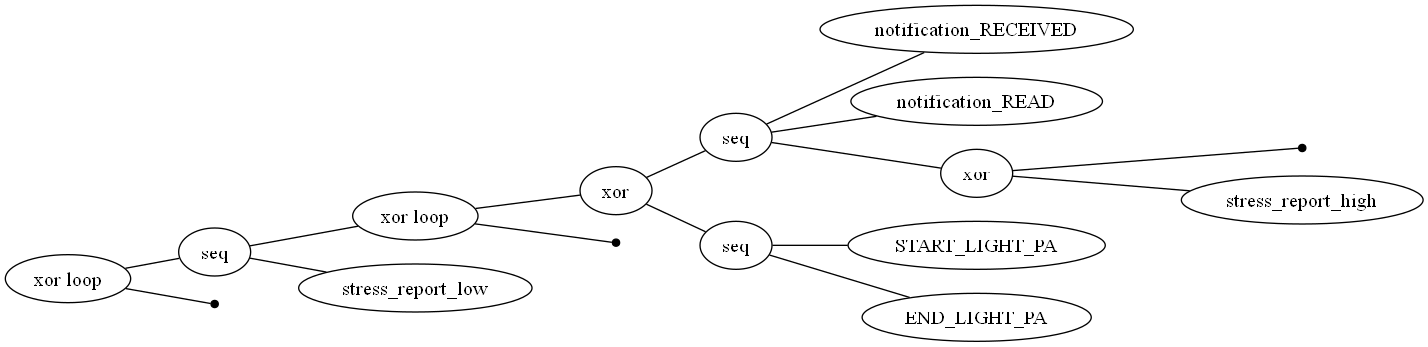

In [5]:
## Discover Process Model
# First get the process tree
process_tree = inductive_miner.apply(event_log)

# Visualize Process Tree
from pm4py.visualization.process_tree import visualizer as pt_visualizer
gviz_pt = pt_visualizer.apply(process_tree)
pt_visualizer.view(gviz_pt)



## Step 6: Converting to Petri Net

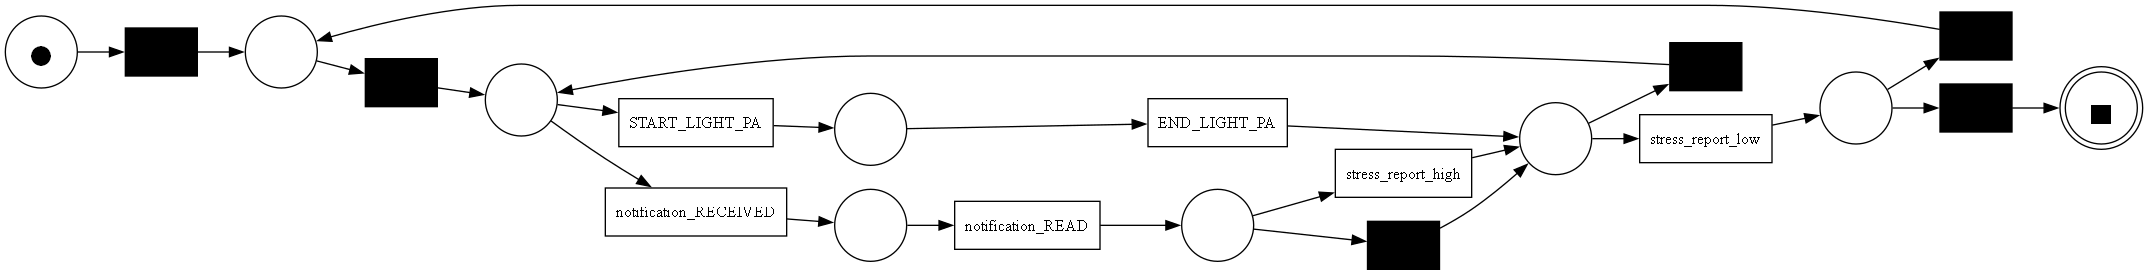

In [6]:
# Convert process tree to Petri net
from pm4py.objects.conversion.process_tree import converter as pt_converter
net, initial_marking, final_marking = pt_converter.apply(process_tree)

# Visualizing
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)